<a href="https://colab.research.google.com/github/dongspam0209/ML-DL_base/blob/main/ICE4020_HW01_ipynb_12191727_%EA%B9%80%EB%8F%99%ED%95%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW01: Regression, Cross-Validation, and Regularization

아래 코드 문제들을 풀고, 설명을 작성하시오.

## Code Task 1: Implement `calc_root_mean_squared_error`

See the test cases below and complete `calc_root_mean_squared_error`.

In [ ]:
'''
Test Cases
--------
>>> y_N = 0.0
>>> yhat_N = 4.123
>>> calc_root_mean_squared_error(y_N, yhat_N)
4.123

>>> y_N = np.asarray([-2, 0, 2], dtype=np.float64)
>>> yhat_N = np.asarray([-4, 0, 2], dtype=np.float64)
>>> rmse = calc_root_mean_squared_error(y_N, yhat_N)
>>> np.round(rmse, 6)
1.154701
'''



import numpy as np


def calc_root_mean_squared_error(y_N, yhat_N):
    ''' Compute root mean squared error given true and predicted values

    Args
    ----
    y_N : 1D array, shape (N,)
        Each entry represents 'ground truth' numeric response for an example
    yhat_N : 1D array, shape (N,)
        Each entry representes predicted numeric response for an example

    Returns
    -------
    rmse : scalar float
        Root mean squared error performance metric
        .. math:
            rmse(y,\hat{y}) = \sqrt{\frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2}
    # '''

    y_N = np.atleast_1d(y_N) # 적어도 한개의 차원이 있는 array로 convert
    yhat_N = np.atleast_1d(yhat_N)
    assert y_N.ndim == 1 # y_N의 차원이 1차원이 아닌경우 error
    assert y_N.shape == yhat_N.shape # yhat_N의 차원이 y_N의 차원과 다른 경우 error
    return np.sqrt(1/len(y_N)*sum((y_N-yhat_N)**2))

# Test case
# case 1
y_N=0.0
yhat_N=4.123

# case 2
# y_N = np.asarray([-2, 0, 2], dtype=np.float64)
# yhat_N = np.asarray([-4, 0, 2], dtype=np.float64)

rmse=calc_root_mean_squared_error(y_N,yhat_N)
print(np.round(rmse, 6))

4.123


## Ans 1: 코드 설명
y_N의 길이는 N이다. 즉, $\frac 1 n$ 을

```
1/len(y_N)
```

으로 구현하였고, y_N과 yhat_N의 차이의 제곱을 통해서,
```
(y_N-yhat_N)**2
```
 root_mean_squared_error 수식에 맞는 값을 함수가 반환하게끔 구현했다. return 값만 수정하여도, 두 배열의 mean_squared_error의 값을 반환하는 함수를 만들 수 있었다.(numpy에서의 차 연산은 요소들의 값들을 각각 모두 뺄 수 있기 때문에, 굳이 for loop를 사용할 필요가 없었다.)

 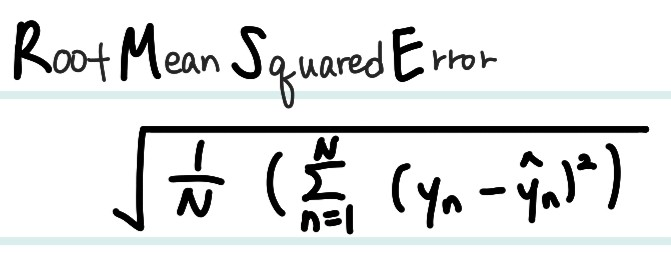

## Code Task 2: Implement `fit` and `predict`

This code defines a LeastSquaresLinearRegressor class with the two key methods of the usual sklearn regression API: `fit` and `predict`. You will edit this file to complete the `fit` and the `predict` methods, which will demonstrate your understanding of what goes on "inside" sklearn-like regressor objects.



### Task 2(a):  The fit method should take in a labeled dataset $\{x_n, y_n\}_{n=1}^N$ and instantiate two instance attributes

* `w_F` : 1D numpy array, shape (n_features = F,) Represents the 'weights' Contains float64 entries of the weight coefficients
* `b` : scalar float Represents the 'bias' or 'intercept'.

Hint: Within a Python class, you can set an attribute like `self.b = 1.0`.

Nothing should be returned. You're updating the internal state of the object.

These attributes should be set using the formulas discussed in class (Lecture 03) for solving the "least squares" optimization problem (finding w and b values that minimize squared error on the training set).



### Task 2(b):  The `predict` method should take in an array of feature vectors $\{x_n\}^N_{n=1}$ and produce (return) the predicted responses $\{\hat{y}(x_n)\}^N_{n=1}$.

Recall that for linear regression, we've defined the prediction function as:

$$\hat{y}(x_n)=b+w^Tx_n=b+\sum_{f=1}^F{w_f x_{n,f}}$$

In [ ]:
'''
Test Case
---------
>>> prng = np.random.RandomState(0)
>>> N = 100

>>> true_w_F = np.asarray([1.1, -2.2, 3.3])
>>> true_b = 0.0
>>> x_NF = prng.randn(N, 3)
>>> y_N = true_b + np.dot(x_NF, true_w_F) + 0.03 * prng.randn(N)

>>> linear_regr = LeastSquaresLinearRegressor()
>>> linear_regr.fit(x_NF, y_N)

>>> yhat_N = linear_regr.predict(x_NF)
>>> np.set_printoptions(precision=3, formatter={'float':lambda x: '% .3f' % x})
>>> print(linear_regr.w_F)
[ 1.099 -2.202  3.301]
>>> print(np.asarray([linear_regr.b]))
[-0.005]
'''

import numpy as np
# No other imports allowed!

class LeastSquaresLinearRegressor(object):
    ''' A linear regression model with sklearn-like API

    Fit by solving the "least squares" optimization problem.

    Attributes
    ----------
    * self.w_F : 1D numpy array, size n_features (= F)
        vector of weights, one value for each feature
    * self.b : float
        scalar real-valued bias or "intercept"
    '''

    def __init__(self):
        ''' Constructor of an sklearn-like regressor

        Should do nothing. Attributes are only set after calling 'fit'.
        '''
        # Leave this alone
        pass

    def fit(self, x_NF, y_N):
        ''' Compute and store weights that solve least-squares problem.

        Args
        ----
        x_NF : 2D numpy array, shape (n_examples, n_features) = (N, F)
            Input measurements ("features") for all examples in train set.
            Each row is a feature vector for one example.
        y_N : 1D numpy array, shape (n_examples,) = (N,)
            Response measurements for all examples in train set.
            Each row is a feature vector for one example.

        Returns
        -------
        Nothing.

        Post-Condition
        --------------
        Internal attributes updated:
        * self.w_F (vector of weights for each feature)
        * self.b (scalar real bias, if desired)

        Notes
        -----
        The least-squares optimization problem is:

        .. math:
            \min_{w \in \mathbb{R}^F, b \in \mathbb{R}}
                \sum_{n=1}^N (y_n - b - \sum_f x_{nf} w_f)^2
        '''
        N, F = x_NF.shape
        X_with_bias=np.hstack([np.ones((N,1)),x_NF])
        A=np.dot(X_with_bias.T,X_with_bias)
        b=np.dot(X_with_bias.T,y_N)

        weights_bias=np.linalg.solve(A,b)
        self.b=weights_bias[0]
        self.w_F=weights_bias[1:]

        # Hint: Use np.linalg.solve
        # Using np.linalg.inv may cause issues (see day03 lab)
        pass # TODO fixme


    def predict(self, x_MF):
        ''' Make predictions given input features for M examples

        Args
        ----
        x_MF : 2D numpy array, shape (n_examples, n_features) (M, F)
            Input measurements ("features") for all examples of interest.
            Each row is a feature vector for one example.

        Returns
        -------
        yhat_M : 1D array, size M
            Each value is the predicted scalar for one example
        '''
        M,_=x_MF.shape
        X_with_bias=np.hstack([np.ones((M,1)),x_MF])
        yhat_M=np.dot(X_with_bias,np.hstack([self.b,self.w_F]))
        # TODO FIX ME
        return yhat_M

## Ans 2: 코드 설명

### 2(a)

최소제곱법에서 linear regression model의 최적의 가중치를 계산하기 위해, 오차의 제곱합을 최소화하는 것으로 구현한다.

$min(J(w))=||y-Xw||^2$ ($y$:실제 값 $Xw$: 선형회귀 모델이 예측한 값)

위의 loss함수 $J(w)$를 최소화 하는 것을 목표로한다.

오차 제곱합 w에 대해서 미분을 한뒤, 그 값이 0이 되는 해로 $J(w)$를 최소화 하는 w를 찾아야한다.

각각 $y,X,w$ 모두 행렬이기 때문에, 위의 오차 제곱합은 행렬식으로 표현이 가능하다.


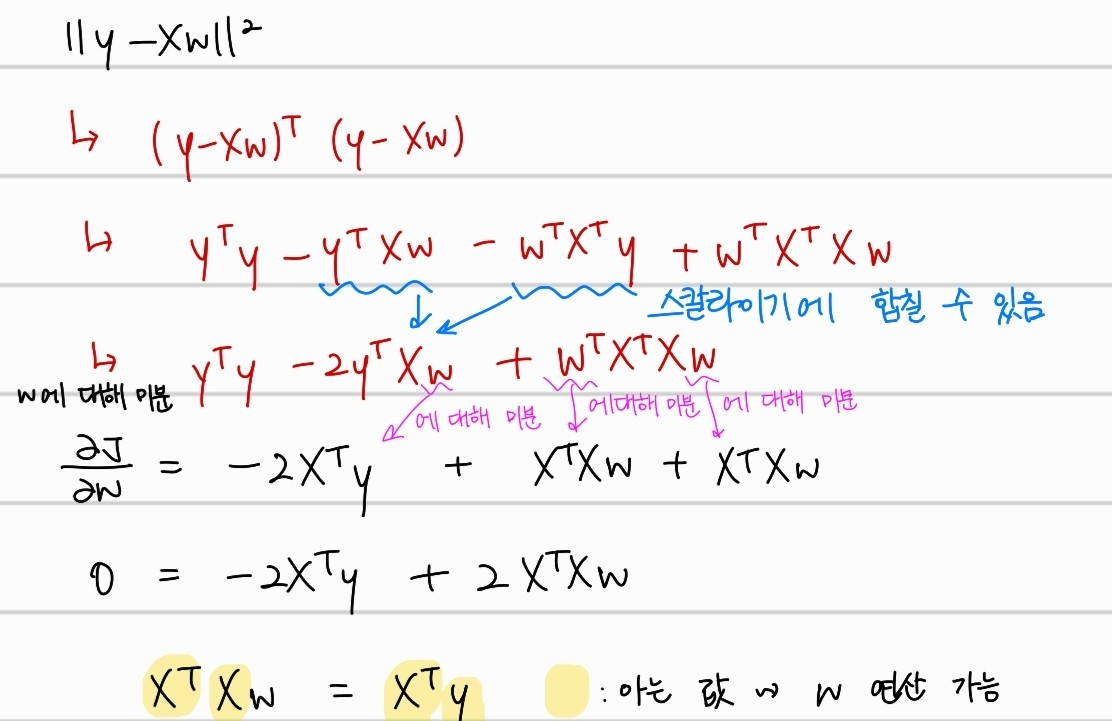

위와 같이 정규표현식으로 나타내면, w를 제외한 다른 값들은 알고있기에 최소화하는 즉 미분값을 0으로 하는 w를 계산해낼 수 있다. 하지만, 여기서 중요한 점은 바로 bias다. $Xw$ 만이 아니라, bias값인 b가 존재하기 때문에, $X$에 대한 전처리 과정이 불가피하다

$w$ 벡터에 bias b값을 포함하기 위해서, X_with_bias 변수를 생성해, 모든 element 값이 1인 열을 첫번째 열에 더해 생성한다. 아래의 사진과 같은 연산과정으로, 바이어스를 포함한, $w$ 벡터를 구할 수 있게 된다.

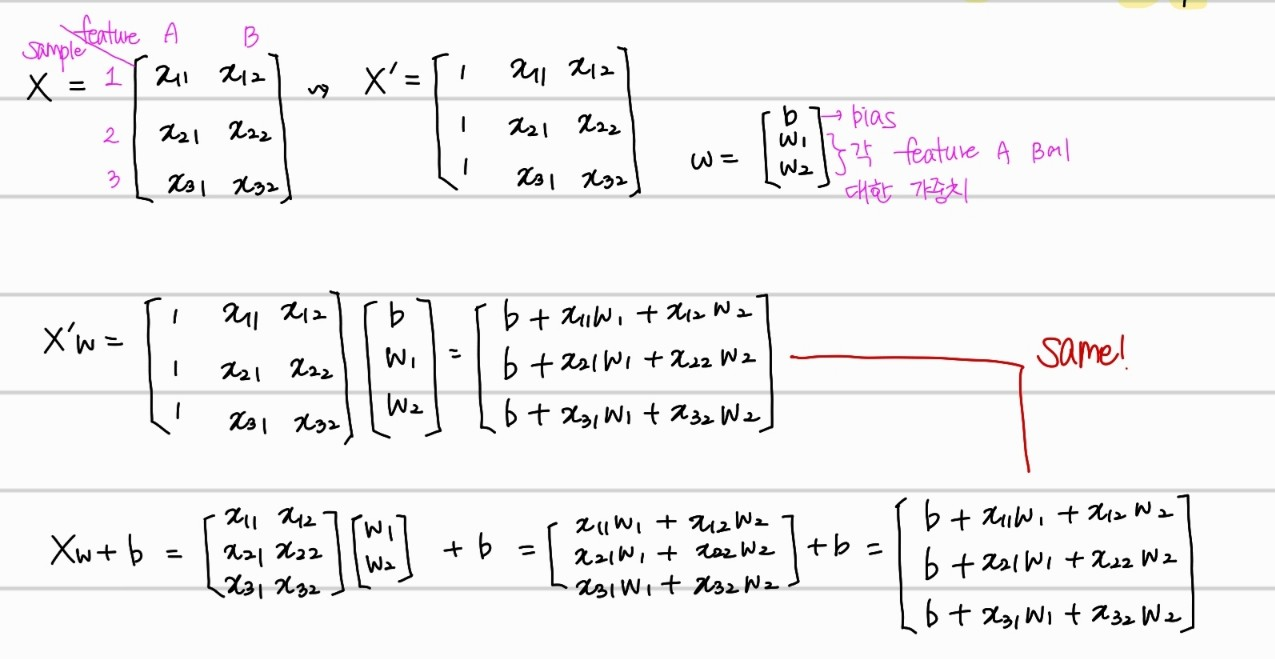

위의 사진과 같이, $w$ 벡터에 bias값을 포함하는 가중치로 연산이 가능하다.

```
 X_with_bias=np.hstack([np.ones((N,1)),x_NF])
        A=np.dot(X_with_bias.T,X_with_bias)
        b=np.dot(X_with_bias.T,y_N)
```
위의 코드로, 구현 한 것이다. 먼저 첫번째 열에 1값을 추가하는 것을 np.hstack을 통해서 구현하였고, $X^TX$ 와 $X^Ty$를 각각 dot product을 사용해, A와 b로 구현했다. 결론적으로, $Aw=b$ 로 구현이 되었고, np.linalg.solve함수를 통해서, w값을 역행렬 연산없이 구할 수 있었다. 여기서 $w$ vector는 첫번째 idx값에 bias 그 뒤의 idx값에는 각각의 특성에 곱해진 w값이 저장되어있다. 따라서,
```
        self.b=weights_bias[0]
        self.w_F=weights_bias[1:]
```
로 bias와 feature당 weight값을 할당해주는 것으로 fit함수를 구현했다.

### 2-(b)
위에서 얻은 bias와 weight를 사용해
```
M,_=x_MF.shape
        X_with_bias=np.hstack([np.ones((M,1)),x_MF])
        yhat_M=np.dot(X_with_bias,np.hstack([self.b,self.w_F]))
        # TODO FIX ME
        return yhat_M
```
를 통해 이전과 같은 방법으로 $X$와 $w$ 값을 수정한 뒤, $Xw$을 통해서 예측값 $\hat y$을 계산하였다.

In [ ]:
# Test code
def test_on_toy_data(N=100):
    '''
    Simple example use case
    With toy dataset with N=100 examples
    created via a known linear regression model plus small noise
    '''
    prng = np.random.RandomState(0)

    true_w_F = np.asarray([1.1, -2.2, 3.3])
    true_b = 0.0
    x_NF = prng.randn(N, 3)
    y_N = true_b + np.dot(x_NF, true_w_F) + 0.03 * prng.randn(N)

    linear_regr = LeastSquaresLinearRegressor()
    linear_regr.fit(x_NF, y_N)

    yhat_N = linear_regr.predict(x_NF)

    np.set_printoptions(precision=3, formatter={'float':lambda x: '% .3f' % x})

    print("True weights")
    print(true_w_F)
    print("Estimated weights")
    print(linear_regr.w_F)

    print("True intercept")
    print(np.asarray([true_b]))
    print("Estimated intercept")
    print(np.asarray([linear_regr.b]))

if __name__ == '__main__':
    test_on_toy_data()

True weights
[ 1.100 -2.200  3.300]
Estimated weights
[ 1.099 -2.202  3.301]
True intercept
[ 0.000]
Estimated intercept
[-0.005]


## Code Task 3: Randomly divide data into splits and estimate training and heldout error.

### Task 3(a) : Implement the `make_train_and_test_row_ids_for_n_fold_cv` function


This function should consume the number of examples, the desired number of folds, and a pseudo-random number generator. Then, it will produce, for each of the desired number of folds, arrays of integers indicating which rows of the dataset belong to the training set, and which belong to the test set.


See the starter code for detailed specification.

Note : For each fold, you do NOT need to produce exactly the same random splits as our code. For instance, while creating 3 fold splits for an array all_examples=[1, 2, 3, 4, 5], the examples in each in fold could be :

* fold0_examples=[1, 2]
* fold1_examples=[3, 5]
* fold2_examples=[4]
**OR**
* fold0_examples=[3, 4]
* fold1_examples=[1, 5]
* fold2_examples=[2]



In [ ]:
def make_train_and_test_row_ids_for_n_fold_cv(
        n_examples=0, n_folds=3, random_state=0):
    ''' Divide row ids into train and test sets for n-fold cross validation.

    Will *shuffle* the row ids via a pseudorandom number generator before
    dividing into folds.

    Args
    ----
    n_examples : int
        Total number of examples to allocate into train/test sets
    n_folds : int
        Number of folds requested
    random_state : int or numpy RandomState object
        Pseudorandom number generator (or seed) for reproducibility

    Returns
    -------
    train_ids_per_fold : list of 1D np.arrays
        One entry per fold
        Each entry is a 1-dim numpy array of unique integers between 0 to N
    test_ids_per_fold : list of 1D np.arrays
        One entry per fold
        Each entry is a 1-dim numpy array of unique integers between 0 to N

    Guarantees for Return Values
    ----------------------------
    Across all folds, guarantee that no two folds put same object in test set.
    For each fold f, we need to guarantee:
    * The *union* of train_ids_per_fold[f] and test_ids_per_fold[f]
    is equal to [0, 1, ... N-1]
    * The *intersection* of the two is the empty set
    * The total size of train and test ids for any fold is equal to N

    Examples
    --------
    >>> N = 11
    >>> n_folds = 3
    >>> tr_ids_per_fold, te_ids_per_fold = (
    ...     make_train_and_test_row_ids_for_n_fold_cv(N, n_folds))
    >>> len(tr_ids_per_fold)
    3

    # Count of items in training sets
    >>> np.sort([len(tr) for tr in tr_ids_per_fold])
    array([7, 7, 8])

    # Count of items in the test sets
    >>> np.sort([len(te) for te in te_ids_per_fold])
    array([3, 4, 4])

    # Test ids should uniquely cover the interval [0, N)
    >>> np.sort(np.hstack([te_ids_per_fold[f] for f in range(n_folds)]))
    array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

    # Train ids should cover the interval [0, N) TWICE
    >>> np.sort(np.hstack([tr_ids_per_fold[f] for f in range(n_folds)]))
    array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
            8,  9,  9, 10, 10])
    '''
    if hasattr(random_state, 'rand'):
        # Handle case where provided random_state is a random generator
        # (e.g. has methods rand() and randn())
        random_state = random_state # just remind us we use the passed-in value
    else:
        # Handle case where we pass "seed" for a PRNG as an integer
        random_state = np.random.RandomState(int(random_state))

    # TODO obtain a shuffled order of the n_examples
    shuffled_indices=random_state.permutation(n_examples) # np.random.RandomState 사용해서, seed값에 따라 고정된 shuffled indices 추출


    train_ids_per_fold = list()
    test_ids_per_fold = list()

    # TODO establish the row ids that belong to each fold's
    # train subset and test subset
    fold_size=n_examples//n_folds  # fold의 크기
    for idx in range(n_folds):
      start_idx=idx*fold_size
      if idx==n_folds-1: # 마지막 loop에 도달하면,end_idx를 n_examples로 잡아서, shuffled_indices에서 start_idx~end 까지를 test_indices로 부여
        end_idx=n_examples
      else:
        end_idx=start_idx+fold_size
      test_indices=shuffled_indices[start_idx:end_idx] # start_idx~end_idx-1 index에 해당하는 부분을 test_indices로 지정
      train_indices=np.concatenate([shuffled_indices[:start_idx],shuffled_indices[end_idx:]]) # 0부터 start_idx, end_idx부터 shuffled_indices의 끝까지를 train_indices로 지정

      train_ids_per_fold.append(train_indices) #각 fold마다 train,test split case를 저장해둠.
      test_ids_per_fold.append(test_indices)


    return train_ids_per_fold, test_ids_per_fold
    # 결론적으로, test_ids_per_fold는 서로 다른 fold에서 절대 같은 idx값을 가질 수 없고, train_indices는 test_ids_per_fold에 해당될 경우 딱 한번을 제외하고는 모두 포함되기때문에, 총 train_idx_per_fold에 fold의 수-1 만큼 중복된 idx가짐.



N = 11
n_folds = 3
tr_ids_per_fold, te_ids_per_fold = (make_train_and_test_row_ids_for_n_fold_cv(N, n_folds))
print(np.sort([len(tr) for tr in tr_ids_per_fold]))


# # Count of items in training sets
print(np.sort([len(tr) for tr in tr_ids_per_fold]))

# # Count of items in the test sets
print(np.sort([len(te) for te in te_ids_per_fold]))

# # Test ids should uniquely cover the interval [0, N)
print(np.sort(np.hstack([te_ids_per_fold[f]for f in range(n_folds)])))

# # Train ids should cover the interval [0, N) TWICE
print(np.sort(np.hstack([tr_ids_per_fold[f]for f in range(n_folds)])))


[6 8 8]
[6 8 8]
[3 3 5]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


### Task 3(b) : Implement the `train_models_and_calc_scores_for_n_fold_cv` function

This function will use the procedure from 3(a) to determine the different "folds", and then train a separate model at each fold and return that model's training error and heldout error.

In [ ]:
def train_models_and_calc_scores_for_n_fold_cv(
        estimator, x_NF, y_N, n_folds=3, random_state=0):
    ''' Perform n-fold cross validation for a specific sklearn estimator object

    Args
    ----
    estimator : any regressor object with sklearn-like API
        Supports 'fit' and 'predict' methods.
    x_NF : 2D numpy array, shape (n_examples, n_features) = (N, F)
        Input measurements ("features") for all examples of interest.
        Each row is a feature vector for one example.
    y_N : 1D numpy array, shape (n_examples,)
        Output measurements ("responses") for all examples of interest.
        Each row is a scalar response for one example.
    n_folds : int
        Number of folds to divide provided dataset into.
    random_state : int or numpy.RandomState instance
        Allows reproducible random splits.

    Returns
    -------
    train_error_per_fold : 1D numpy array, size n_folds
        One entry per fold
        Entry f gives the error computed for train set for fold f
    test_error_per_fold : 1D numpy array, size n_folds
        One entry per fold
        Entry f gives the error computed for test set for fold f

    Examples
    --------
    # Create simple dataset of N examples where y given x
    # is perfectly explained by a linear regression model
    >>> N = 101
    >>> n_folds = 7
    >>> x_N3 = np.random.RandomState(0).rand(N, 3)
    >>> y_N = np.dot(x_N3, np.asarray([1., -2.0, 3.0])) - 1.3337
    >>> y_N.shape
    (101,)

    >>> import sklearn.linear_model
    >>> my_regr = sklearn.linear_model.LinearRegression()
    >>> tr_K, te_K = train_models_and_calc_scores_for_n_fold_cv(
    ...                 my_regr, x_N3, y_N, n_folds=n_folds, random_state=0)

    # Training error should be indistiguishable from zero
    >>> np.array2string(tr_K, precision=8, suppress_small=True)
    '[0. 0. 0. 0. 0. 0. 0.]'

    # Testing error should be indistinguishable from zero
    >>> np.array2string(te_K, precision=8, suppress_small=True)
    '[0. 0. 0. 0. 0. 0. 0.]'
    '''
    train_error_per_fold = np.zeros(n_folds, dtype=np.float32)
    test_error_per_fold = np.zeros(n_folds, dtype=np.float32)

    # TODO define the folds here by calling your function
    # e.g. ... = make_train_and_test_row_ids_for_n_fold_cv(...)
    train_ids_per_fold, test_ids_per_fold = make_train_and_test_row_ids_for_n_fold_cv(
        len(y_N), n_folds, random_state)
    # y_N 길이 즉 총 데이터셋의 크기, fold의 갯수, random state를 인자로 주어, 이전에 구현한 test_ids/train_ids per_fold 에 저장.

    # TODO loop over folds and compute the train and test error
    # for the provided estimator
    for fold_idx in range(n_folds):
      train_idx = train_ids_per_fold[fold_idx]
      test_idx = test_ids_per_fold[fold_idx]


      x_train, y_train = x_NF[train_idx], y_N[train_idx] #train data set
      x_test, y_test = x_NF[test_idx], y_N[test_idx] #test data set


      estimator.fit(x_train, y_train) #estimator는 제공됨.

      # 훈련 오류 및 테스트 오류 계산
      train_pred = estimator.predict(x_train) #train set에 대해서 estimator가 예측한 결과값
      test_pred = estimator.predict(x_test) #test set에 대해서 estimator가 예측한 결과값

      train_error = np.mean((train_pred - y_train) ** 2)  # mean square error 계산
      test_error = np.mean((test_pred - y_test) ** 2)  # mean square error 계산

      train_error_per_fold[fold_idx] = train_error #각 fold_idx별로 train,test error 저장 및 return
      test_error_per_fold[fold_idx] = test_error

    return train_error_per_fold, test_error_per_fold

In [ ]:
# Test code
N = 101
n_folds = 7
x_N3 = np.random.RandomState(0).rand(N, 3)
y_N = np.dot(x_N3, np.asarray([1., -2.0, 3.0])) - 1.3337
print(y_N.shape)

import sklearn.linear_model
my_regr = sklearn.linear_model.LinearRegression()
tr_K, te_K = train_models_and_calc_scores_for_n_fold_cv(my_regr, x_N3, y_N, n_folds=n_folds, random_state=0)

# Training error should be indistiguishable from zero
print(np.array2string(tr_K, precision=8, suppress_small=True))

# Testing error should be indistinguishable from zero
print(np.array2string(te_K, precision=8, suppress_small=True))

(101,)
[ 0.000  0.000  0.000  0.000  0.000  0.000  0.000]
[ 0.000  0.000  0.000  0.000  0.000  0.000  0.000]


## Ans 3: 코드 설명

### 3-(a)
먼저, n개의 fold에 겹치는 test dataset이 없는것이 가장 중요한 점이다.
```
shuffled_indices=random_state.permutation(n_examples)
```
를 통해서 먼저 index를 shuffle해준다.

```
fold_size=n_examples//n_folds
    for idx in range(n_folds):
      start_idx=idx*fold_size
      if idx==n_folds-1:
        end_idx=n_examples
      else:
        end_idx=start_idx+fold_size
      test_indices=shuffled_indices[start_idx:end_idx]
      train_indices=np.concatenate([shuffled_indices[:start_idx],shuffled_indices[end_idx:]])
   
      train_ids_per_fold.append(train_indices)
      test_ids_per_fold.append(test_indices)


    return train_ids_per_fold, test_ids_per_fold
```
위의 반복문을 통해서 각 fold번호마다 서로 겹치지않는 test dataset을 가지게끔 한다. 모든 데이터에 대해서 한번은 test해봐야한다. 여기서 문제가 발생할 수 있다. 마지막 fold에서는 fold size가 작아서, shuffled_indices의 마지막 index까지 즉 모든 데이터셋에 대해서 test dataset으로 적용하지 못할 수 있다. 따라서, for loop의 마지막 index에서는 end_idx를 dataset의 총 갯수로 설정해, 적어도 한번은 모든 데이터셋에 대해서 test할 수 있게 한다. 간단한 예시로, n_examples가 5이고, n_folds가 3인 case에 대해서 위의 for loop 동작시 각 fold index별로 test,train split이 어떻게 되는지 그려보았다.


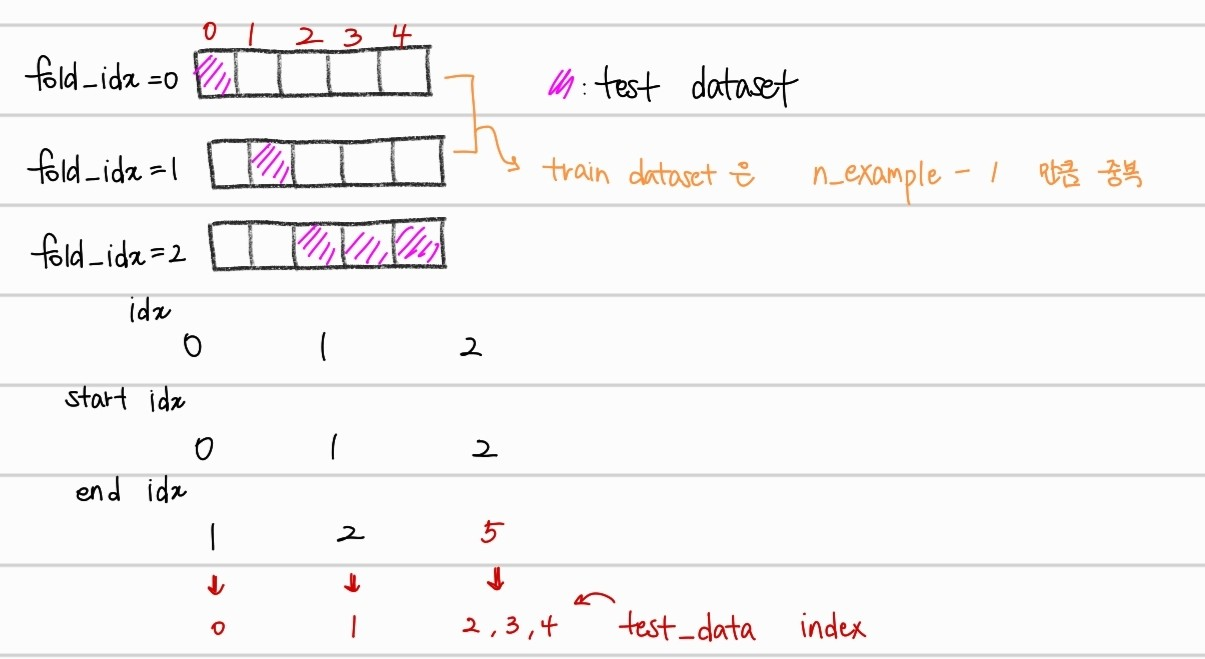

### 3-(b)
```
train_ids_per_fold, test_ids_per_fold = make_train_and_test_row_ids_for_n_fold_cv(
        len(y_N), n_folds, random_state)
```
이전에 만들어둔 make_train_and_test_row_ids_for_n_fold_cv를 사용해서, fold 마다 train, test idx를 저장해둔 리스트를 생성한다.


```
for fold_idx in range(n_folds):
      train_idx = train_ids_per_fold[fold_idx]
      test_idx = test_ids_per_fold[fold_idx]

      
      x_train, y_train = x_NF[train_idx], y_N[train_idx] #train data set
      x_test, y_test = x_NF[test_idx], y_N[test_idx] #test data set


      estimator.fit(x_train, y_train) #estimator는 제공됨.

      # 훈련 오류 및 테스트 오류 계산
      train_pred = estimator.predict(x_train) #train set에 대해서 estimator가 예측한 결과값
      test_pred = estimator.predict(x_test) #test set에 대해서 estimator가 예측한 결과값

      train_error = np.mean((train_pred - y_train) ** 2)  # mean square error 계산
      test_error = np.mean((test_pred - y_test) ** 2)  # mean square error 계산

      train_error_per_fold[fold_idx] = train_error #각 fold_idx별로 train,test error 저장 및 return
      test_error_per_fold[fold_idx] = test_error

```
제공된 estimator를 사용해서, fold별로 x_train,y_train을 통해 fit한다.모두, train_idx,test_idx가 fold_idx마다 달라지기 때문에, x_train과 y_train,x_test와 y_test모두 fold idx별로 달라진다.

estimator의 predict함수를 통해서, train예측값과 test예측값을 저장해둔뒤, mean square error를 계산해 각 fold별로 train,test_error를 저장한뒤, return해준다.

Original resource: [Introductions to Machine Learning, tufts](https://www.cs.tufts.edu/comp/135/2023f/)
